# LAB04: K-means

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

## Assignment 1 (4 scores):

- Generate a toy dataset having $600$ data points, $200$ points of them following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma)$, $200$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma)$, and $200$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma)$ where $\Sigma = 
\left(\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right)
$.

In [108]:
mean = [[2, 2], [8, 3], [3, 6]]
cov = [[1,0], [0,1]]
n = 200

X0 = np.random.multivariate_normal(mean[0], cov, n)
X1 = np.random.multivariate_normal(mean[1], cov, n)
X2 = np.random.multivariate_normal(mean[2], cov, n)

In [109]:
def plot_clusters(X, labels):
    fig, ax = plt.subplots()

    X0 = X[labels == 0]
    X1 = X[labels == 1]
    X2 = X[labels == 2]

    ax.plot(X0[:, 0], X0[:, 1], 'rs', markersize=5, alpha=.5, label = 'X0')
    ax.plot(X1[:, 0], X1[:, 1], 'go', markersize=5, alpha=.5, label = 'X1')
    ax.plot(X2[:, 0], X2[:, 1], 'b^', markersize=5, alpha=.5, label = 'X2')
    ax.legend()

    return fig

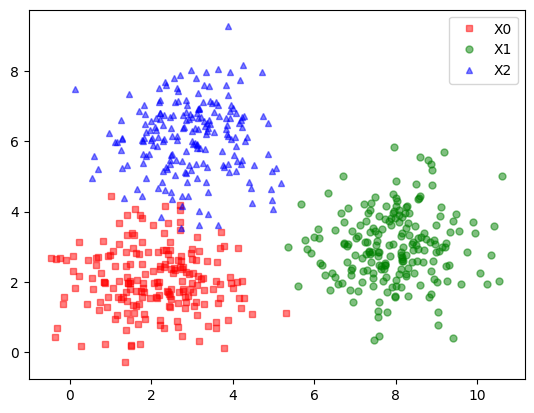

In [110]:
X = np.vstack((X0, X1, X2))
original_label = np.asanyarray([0]*n + [1]*n + [2]*n)
original_fig = plot_clusters(X, original_label)

- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.

In [111]:
K = 3

In [112]:
def initialize_centroids(X, K):
    idx = np.random.choice(X.shape[0], K, replace=False)
    centroids = X[idx]
    return centroids

In [113]:
def assign_clusters(X, centroids, K):
    distances = np.zeros((X.shape[0], K))
    for i in range(K):
        distances[:, i] = np.linalg.norm(X - centroids[i], axis=1)
    labels = np.argmin(distances, axis=1)
    return labels

In [114]:
def update_centroids(X, labels, K):
    new_centroids = np.zeros((K, X.shape[1]))
    for i in range(K):
        points_in_cluster = X[labels == i]
        new_centroids[i] = np.mean(points_in_cluster, axis=0)
    return new_centroids

In [115]:
def has_converged(centroids, new_centroids):
    return np.linalg.norm(centroids - new_centroids, axis=1) < 1e-4

In [116]:
def EM_kmeans(X, K):
    centroids = initialize_centroids(X, K)
    all_labels = []
    for i in range(1, 100):
        # E-step
        labels = assign_clusters(X, centroids, K)
        all_labels.append(labels)
        # M-step
        new_centroids = update_centroids(X, labels, K)
        
        # stop if centroids do not change
        if has_converged(centroids, new_centroids).all():
            break
        centroids = new_centroids
            
    return centroids, all_labels, i

- Train this K-means with EM method.

Centroids after 4 iterations: 
 [[2.9537622  6.11536545]
 [7.92719172 2.99715165]
 [2.10115542 2.04189552]]


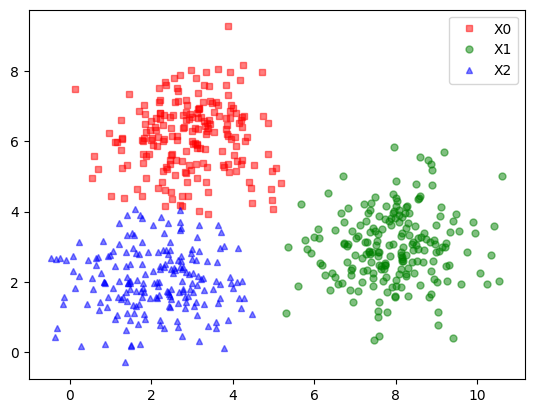

In [117]:
centroids, all_labels, i = EM_kmeans(X, K)
print(f"Centroids after {i} iterations: \n", centroids)
last_fig = plot_clusters(X, all_labels[-1])

In [118]:
def save_plots_pdf(X, all_labels, filename):
    with PdfPages(f'{filename}.pdf') as pdf:
        for i, labels in enumerate(all_labels):
            pic = plot_clusters(X, labels)
            pic.suptitle(f'Iteration {i+1}')
            pdf.savefig(pic)
            plt.close(pic)
    print(f"Saved plots to {filename}.pdf")

In [119]:
save_plots_pdf(X, all_labels, 'assignment1')

Saved plots to assignment1.pdf


#### Give comments on the effect of intializing centroids randomly to the overall performance of K-means.

**Khởi tạo tâm cụm ngẫu nhiên ảnh hưởng thế nào tới K-means:**

Do K-means là thuật toán tối ưu bằng cách giảm thiểu khoảng cách của các điểm đến tâm cụm qua nhiều lần lặp lại. Vì vậy nếu chọn ngẫu nhiên:

- **Kết quả:** không ổn định, mỗi lần sẽ cho kết quả khác nhau, có thể đúng hoặc sai.
- **Chưa tối ưu:** có nguy cơ dừng ở cực tiểu cục bộ thay vì cực tiểu toàn cục.
- **Tốc độ:** nếu trong lần ngẫu nhiên mà phân cụm kém sẽ mất thời gian - mất nhiều vòng lặp hơn để hội tụ, ngược lại nếu khởi tạo tốt thì hội tụ nhanh và kết quả chính xác hơn.

**Cách khắc phục:** chạy K-means nhiều lần với các khởi tạo ngẫu nhiên khác nhau để chọn kết quả tốt nhất.


## Assigment 2:

- Generate a toy dataset having $50$ points following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma)$, $20$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma)$, and $1000$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma)$ where $\Sigma = 
\left(\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right)
$.
- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.

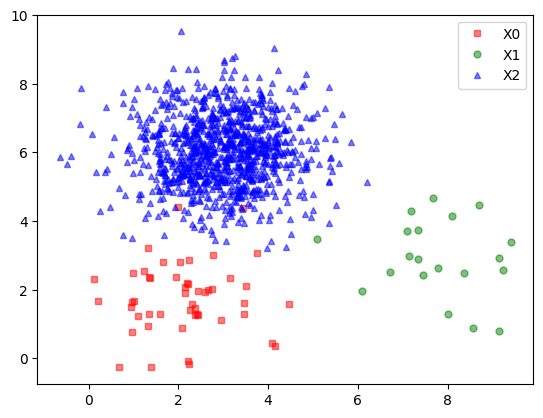

In [144]:
n = [50, 20, 1000]

X0 = np.random.multivariate_normal(mean[0], cov, n[0])
X1 = np.random.multivariate_normal(mean[1], cov, n[1])
X2 = np.random.multivariate_normal(mean[2], cov, n[2])

X = np.vstack((X0, X1, X2))
original_label = np.asanyarray([0]*n[0] + [1]*n[1] + [2]*n[2])
original_fig = plot_clusters(X, original_label)

Centroids after 13 iterations: 
 [[2.16204712 5.7996579 ]
 [3.6453484  2.80176437]
 [3.69662268 6.43127248]]


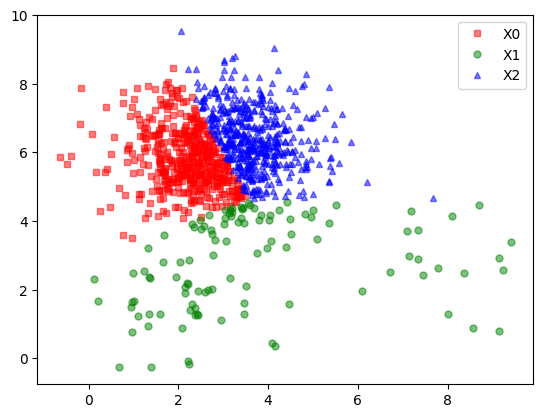

In [145]:
centroids, labels, i = EM_kmeans(X, K)
print(f'Centroids after {i} iterations: \n', centroids)
last_fig = plot_clusters(X, labels[-1])

In [146]:
save_plots_pdf(X, labels, 'assignment2')

Saved plots to assignment2.pdf


### Give comments on the effect of different sizes among clusters to the performance of K-means.

**Ảnh hướng của kích thước cụm lên kết quả K-means:**

- **Phân cụm kém chính xác:** K-means là bài toán tối ưu bình phương khoảng cách từ các điểm đến centroid nên cụm có nhiều điểm hơn = tổng khoảng cách lớn hơn = bị ảnh hưởng lớn bởi số lượng điểm -> centroid cụm nhỏ dễ bị lẫn và lệch tâm cụm về cụm lớn

- **Kết quả tệ ngay khi khởi tạo:** với cụm nhỏ, xác suất centroid khởi tạo rơi vào cụm thấp hơn

- **Trong trường hợp này:** cụm có kích thước lớn sẽ chi phối centroid chung như cụm [3, 6] với 1000 điểm ảnh hưởng lớn đến 2 cụm còn lại là cụm [2, 2], [8, 3] đã bị kéo lệch lên -> K-means không giữ được đúng vị trị trung tâm cụm ban đầu

## Assignment 3 (2 scores):

- Generate a toy dataset having $600$ data points, $200$ points of them following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma_1)$, $200$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma_1)$, and $200$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma_2)$ where 

$$
    \Sigma_1 = 
    \left(\begin{array}{cc}
        1 & 0 \\
        0 & 1
    \end{array}\right)
$$ 

and

$$
\Sigma_2 = 
    \left(\begin{array}{cc}
        10 & 0 \\
        0 & 1
    \end{array}\right)
$$.

- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.

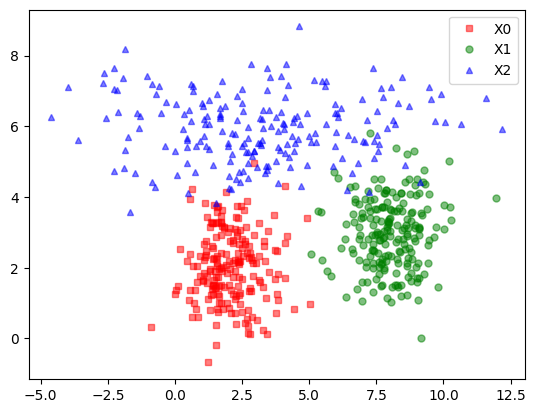

In [158]:
cov1 = [[1, 0], [0, 1]]
cov2 = [[10, 0], [0, 1]]
n = 200

X0 = np.random.multivariate_normal(mean[0], cov1, n)
X1 = np.random.multivariate_normal(mean[1], cov1, n)
X2 = np.random.multivariate_normal(mean[2], cov2, n)

X = np.vstack((X0, X1, X2))
original_label = np.array([0]*n + [1]*n + [2]*n)
orignial_fig = plot_clusters(X, original_label) 


Centroids after 7 iterations: 
 [[7.9256328  3.5428896 ]
 [2.01531519 1.99428429]
 [1.86140822 5.9026238 ]]


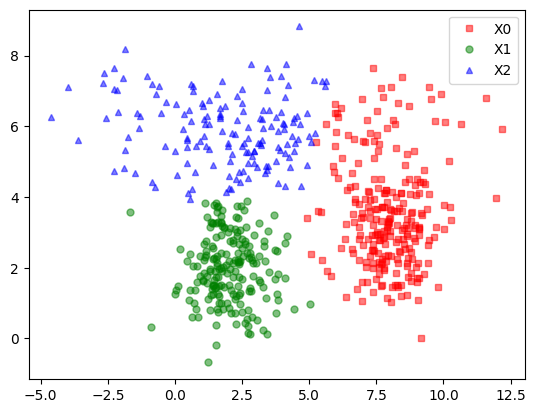

In [159]:
centroids, labels, i = EM_kmeans(X, K)
print(f'\nCentroids after {i} iterations: \n', centroids)
last_fig = plot_clusters(X, labels[-1])

In [160]:
save_plots_pdf(X, labels, 'assignment3')

Saved plots to assignment3.pdf


- ### Give comments on the effect of distribution $\mathcal{N}((3, 6), \Sigma_2)$ to the performance of K-means.

**Ảnh hướng của phân phối $\mathcal{N}((3, 6), \Sigma_2)$ lên K-means:**

- Lớn về phương sai: so với cov1 thì cov2 có phương sai lớn dọc theo trục x = dữ liệu phân bố rất rộng -> centroid cụm bị kéo về phía các điểm xa hơn
- Khó phân biệt cụm: do phân bố rộng nên các điểm ở rìa có thể gần các cụm khác -> giảm độ chính xác 
- Ảnh hưởng hội tụ: cụm có phương sai lớn làm K-means hội tụ chậm hơn hoặc rơi vào các cực tiểu cục bộ do các centroid di chuyển nhiều hơn qua các vòng lặp
- Không phù hợp k-means: k-means giả định các cụm dạng hình cầu (như cov1) với phương sai tương đối đồng đều

**Trong trường hợp này**

Centroids after 7 iterations: 
 [[7.9256328  3.5428896 ]   (8, 3) lệch nhẹ
 [2.01531519 1.99428429]    (2, 2) lệch nhẹ
 [1.86140822 5.9026238 ]]    (3, 6) bị kéo hẳn sang trái do phương sai lớn